In [1]:
import numpy as np
import sys
from matplotlib import pylab as plt
%matplotlib inline

In [2]:
sys.path.append("..")
import fastcat as fc
pz = fc.photoz.PhotoZHist('./pzdist.txt')

../fastcat/photoz_Hist.py:36: RuntimeWarning: invalid value encountered in divide
  self.dataset[:, 3:] = (np.where(integrals!=0., self.dataset[:, 3:].T/integrals, 0.)).T


In [3]:
#ztrues=np.array([0.7, 0.1])
ztrues = 0.1+np.random.rand(10**7)*2.9

In [8]:
arr=np.array(ztrues,dtype=[('z',np.float32)])
arr = pz.applyPhotoZ(arr)

[('iz', '<i8'), ('itype', '<i8'), ('imag', '<i8')]
iz
itype
imag


In [7]:
arr['itype']

array([1, 2, 1, ..., 0, 0, 0])

(2, 901) (2, 901)


(-2, 2)

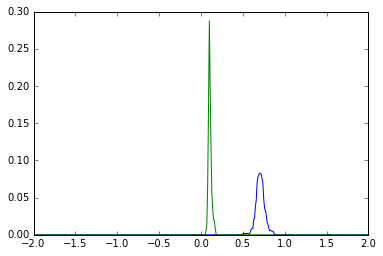

In [4]:
xs=arr['z'][:,np.newaxis]+pz.dz
ys=pz.getpdf(arr)
print xs.shape, ys.shape
[plt.plot(x,y) for x,y in zip(xs,ys)]
plt.xlim(-2, 2)

In [5]:
a=pz.PofZ(arr, 0.6, 1)
b=pz.cPofZ(arr, 1.5)
print a, b

[ 0.99949647  0.7431507 ] [ 0.99949647  1.        ]
